# Hough Transforms

In [1]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os

In [2]:
# Read in and grayscale the image
image_path = os.path.join('examples', 'exit_road.jpg')
image = mpimg.imread(image_path)
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [3]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

In [4]:
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [5]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 4 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 20 # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 #creating a blank to draw lines on

In [6]:
# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [7]:
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

In [8]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges))

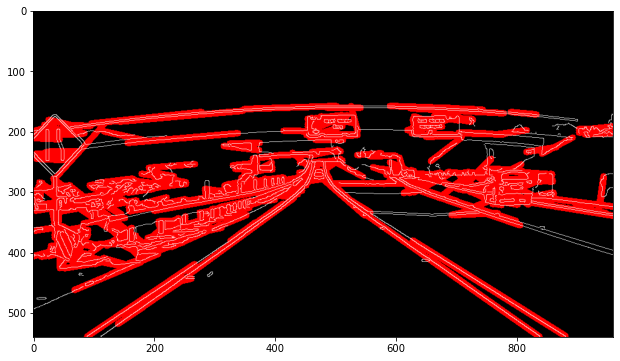

In [9]:
# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.figure(figsize=(12,6))
plt.imshow(combo)
plt.show()

In [10]:
ysize, xsize = combo.shape[0:2]
vertices = np.array([[85, ysize], [474, 285], [891, ysize]])

#defining a 3 channel or 1 channel color to fill the mask with depending on the input image
if len(combo.shape) > 2:
    channel_count = combo.shape[2]  # i.e. 3 or 4 depending on your image
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255

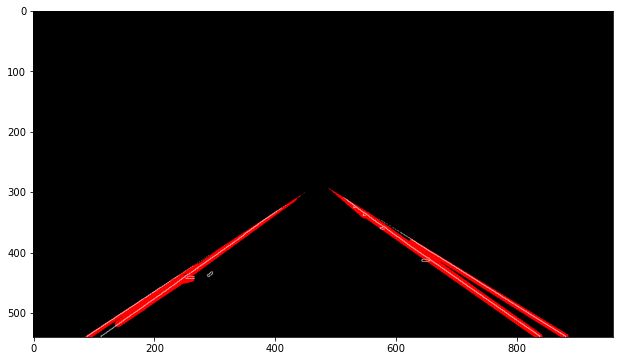

In [11]:
# define the image mask
mask = np.zeros_like(combo)

#filling pixels inside the polygon defined by "vertices" with the fill color    
#cv2.fillPoly(mask, vertices, ignore_mask_color)
cv2.fillPoly(mask, pts = [vertices], color =(255,255,255))
#returning the image only where mask pixels are nonzero
masked_image = cv2.bitwise_and(combo, mask)
plt.figure(figsize=(12,6))
plt.imshow(masked_image)
plt.show()

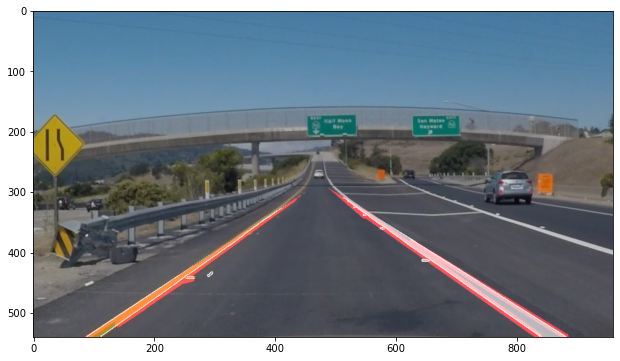

In [12]:
lane_detection = cv2.addWeighted(image, 0.8, masked_image, 1, 0) 
plt.figure(figsize=(12,6))
plt.imshow(lane_detection)
plt.show()